In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os

In [2]:
os.listdir()

['Housing_Price_Prediction.ipynb', '.ipynb_checkpoints', 'kc_house_data.csv']

In [3]:
#Read the file and save as data frame
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.shape

(21597, 21)

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
#To check the presence of null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset has no null values.

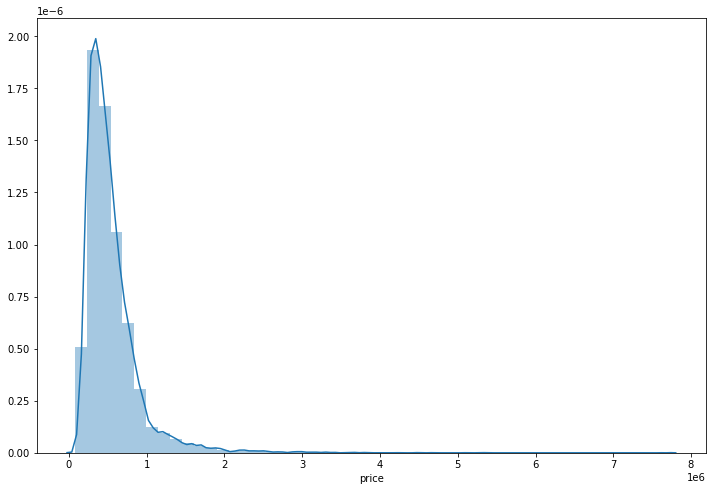

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(data['price'])

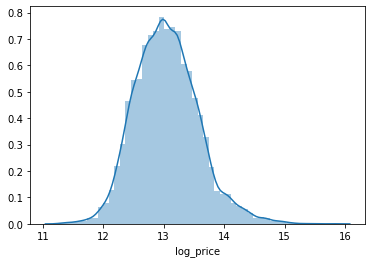

In [10]:
#Log Transformation of Price column to remove right skewness and become normally distributed. Done to remove effect of outliers.
data['log_price'] = np.log(data.price)
sns.distplot(data['log_price'])
plt.show()


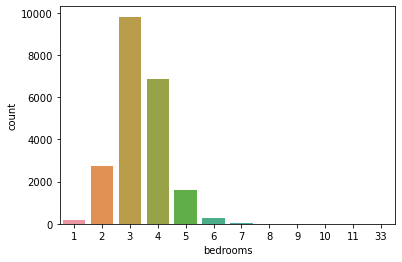

In [11]:
sns.countplot(data['bedrooms'])

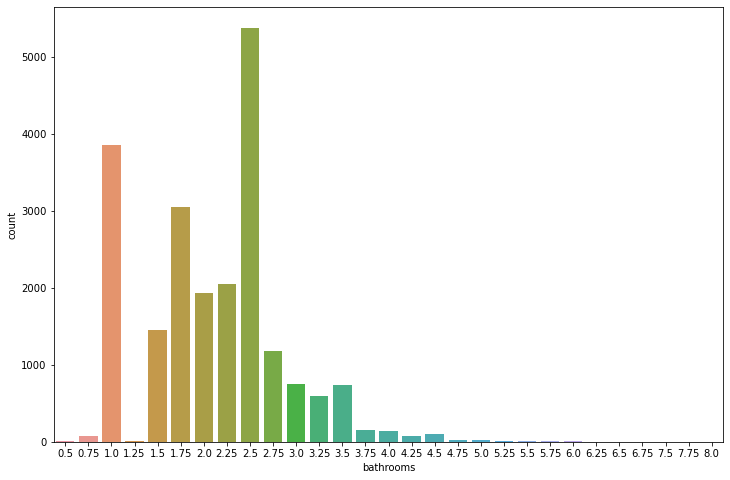

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(data['bathrooms'])

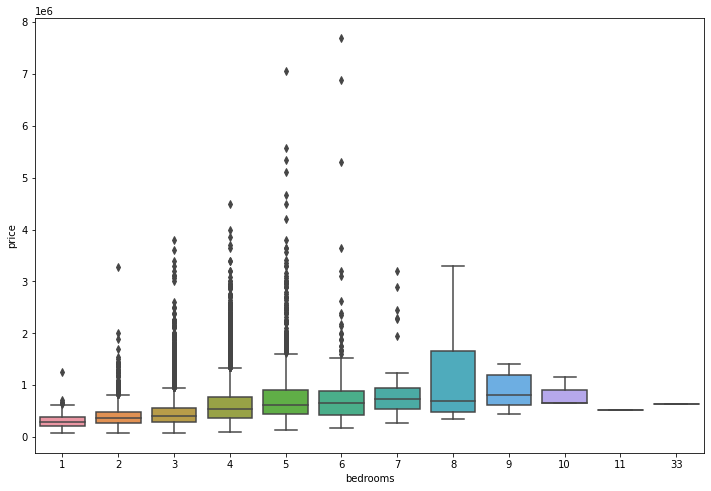

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=data)

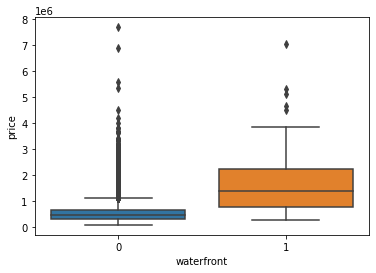

In [14]:
sns.boxplot(x='waterfront',y='price',data=data)

In [15]:
#FEATURE ENGINEERING DATE

In [16]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)

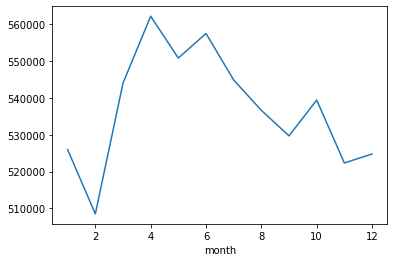

In [17]:
data.groupby('month').mean()['price'].plot()

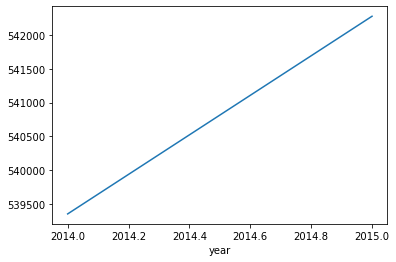

In [18]:
data.groupby('year').mean()['price'].plot()

In [19]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'month',
       'year'],
      dtype='object')

In [20]:
#Remove features that are not required for training

In [21]:
data.zipcode.nunique()

70

In [22]:
#data = data.drop('id',axis = 1)
data = data.drop('date',axis = 1)

In [23]:
data.shape

(21597, 23)

In [24]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
data.yr_built = data.yr_built.astype(str)
data.yr_renovated = data.yr_renovated.astype(str)

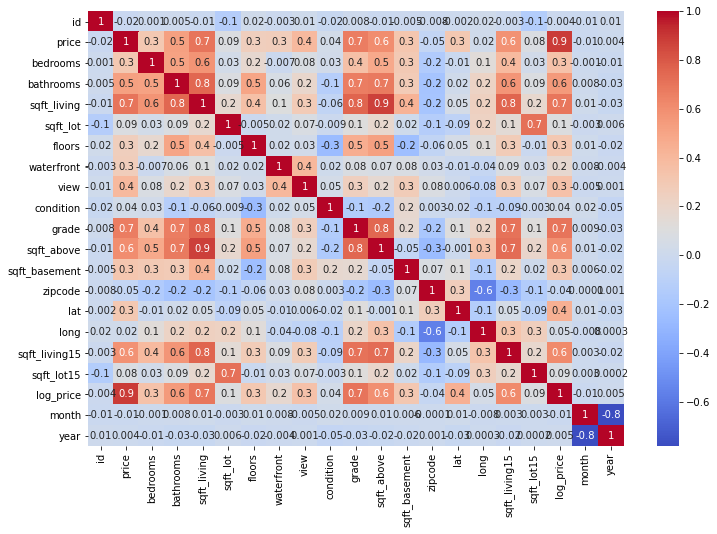

In [26]:
#Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [27]:
#Price has positive correlation with features like sqft_living,grade,sqft_above,sqft_living15,bathrooms etc. 
# These features must be included in building the prediction model. 

## TEST TRAIN SPLIT

In [28]:
X = data.drop(['price','log_price','sqft_above','id'],axis=1)

y = data['log_price']

In [29]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,291.725008,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,2014.322962
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,442.667800,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,0.467619
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,2014.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [30]:
y.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: log_price, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## SCALING

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_test.shape

(6480, 19)

In [35]:
X_train.shape

(15117, 19)

## MACHINE LEARNING MODELS

In [36]:
# Models being used - Multinomial Linear Regression, Decision Trees, Random Forest, XGBOOST
# Evaluation - MSE
# Others - Hyper Paramenter Tuning by Grid Search, K fold Cross validation, AOC Curve for all methods, 
# Compare training time.
# Is regularization necessary?

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.16037405  0.45397453  1.36421388  0.81757134  0.18868662  0.38263801
  0.23056858  0.24438843  1.59066975  0.06581184 -0.39611268  0.07307784
 -0.13269584  0.86868916 -0.24620235  0.57352085 -0.17614871  0.0245625
  0.06174452]


In [39]:
lr_predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

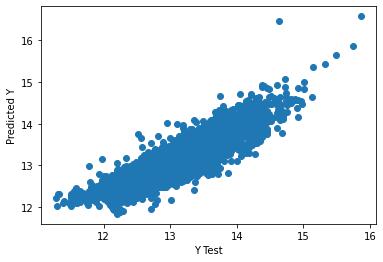

In [40]:
plt.scatter(y_test,lr_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
# calculate these metrics by hand!
from sklearn import metrics

print('lr_MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('lr_MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('lr_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

lr_MAE: 0.19166989329834752
lr_MSE: 0.061067191691916274
lr_RMSE: 0.24711776887127376


In [42]:
metrics.explained_variance_score(y_test,lr_predictions)

0.7780207348311129

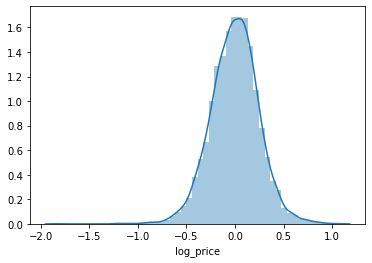

In [43]:
sns.distplot((y_test-lr_predictions),bins=50)

In [44]:
#Decision Trees

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
dt_predictions = dtree.predict(X_test)

In [47]:
print('DT_MAE:', metrics.mean_absolute_error(y_test, dt_predictions))
print('DT_MSE:', metrics.mean_squared_error(y_test, dt_predictions))
print('DT_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))

DT_MAE: 0.17832382633180469
DT_MSE: 0.06174396691647825
DT_RMSE: 0.24848333327705954


In [48]:
metrics.explained_variance_score(y_test,dt_predictions)

0.7756613349820058

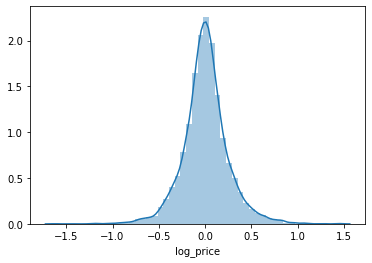

In [49]:
sns.distplot((y_test-dt_predictions),bins=50)

In [50]:
#Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [52]:
rf_predictions = rfc.predict(X_test)

In [53]:
print('rf_MAE:', metrics.mean_absolute_error(y_test, rf_predictions))
print('rf_MSE:', metrics.mean_squared_error(y_test, rf_predictions))
print('rf_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))

rf_MAE: 0.12181961569999204
rf_MSE: 0.029795647542472423
rf_RMSE: 0.1726141580012266


In [54]:
metrics.explained_variance_score(y_test,rf_predictions)

0.8916812275202324

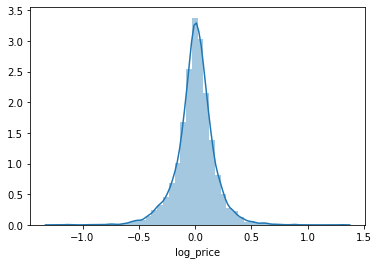

In [55]:
sns.distplot((y_test-rf_predictions),bins=50)

In [56]:
#Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [58]:
GB = GradientBoostingRegressor()
GBparameters = {'learning_rate': [0.02,0.03],
                  'subsample'    : [0.7,0.5],
                  'n_estimators' : [1200,1500],
                  'max_depth'    : [6,8]
                 }
grid_GB = GridSearchCV(estimator = GB, param_grid = GBparameters, cv = 5, n_jobs = -1) 
grid_GB.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03], 'max_depth': [6, 8],
                         'n_estimators': [1200, 1500],
                         'subsample': [0.7, 0.5]})

In [59]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9068800008165485

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.5}


In [60]:
GB_predictions = grid_GB.predict(X_test)

In [61]:
print('GB_MAE:', metrics.mean_absolute_error(y_test, GB_predictions))
print('GB_MSE:', metrics.mean_squared_error(y_test, GB_predictions))
print('GB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_predictions)))

GB_MAE: 0.11015835920925326
GB_MSE: 0.024537069418551643
GB_RMSE: 0.15664312758161988


In [62]:
metrics.explained_variance_score(y_test,GB_predictions)

0.9107967895113955

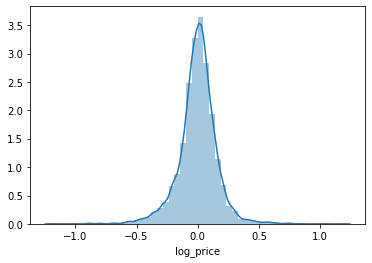

In [63]:
sns.distplot((y_test-GB_predictions),bins=50)

### Results for different models

Model 1 - Basic where price and log_price was removed.All features included. No grid search, no encoding

Variance Explained:
LR - 77.5
DT - 77.4
RF - 89
GB - 90

Model 2 - Selecting few features - remove sqft_above,month,year

LR - 77.3
DT - 77.2

Model 3 - Remove sqft_above, month, year, lat, long

LR - 65.7
DT - 46

Model 4 - Features added - zipcode,ID. reMOVED - SQFT_ABOVE
LR - 77.7
DT - 77.5

Model 5 - Remove ID, sqft_above
LR - 77.8
DT - 77.4



Best Model - Gradient Boosting with Grid Search Hyperparameter values:
learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.5
It gave a score of 0.906